<h1 align='center'>Análisis de ventas con Montecarlo

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Opciones estéticas
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
np.random.seed(42)  

Creación del dataset

In [35]:
# Creando una muestra de 1000 clientes y 12 meses
n_clientes = 1000   
meses = pd.date_range(start="2024-01-01", periods=12, freq="ME")

# Creando diccionario con elementos del Dataset

data = {
    # Creando numeros de clientes partiendo del 1
    "cliente_id": np.random.randint(1, n_clientes+1, size=5000),
    # Creando fechas de cada compra
    "Fecha": np.random.choice(meses, size=5000),
    # Creando categorias de cada compra con proporciones específicas en la muestra
    "Categoria": np.random.choice(["Electrónica", "Ropa", "Hogar", "Juguetes"], size=5000, p=[0.3,0.4,0.2,0.1]),
    # Creando montos de compras con una distribución gamma
    "Monto": np.random.gamma(shape=2.0, scale=200, size=5000).round(2)  
}

# Creando  DataFrame a paritr del diccionario
df = pd.DataFrame(data)
df.head()

,cliente_id,Fecha,Categoria,Monto
0,918,2024-05-31,Ropa,47.96
1,206,2024-07-31,Electrónica,768.95
2,469,2024-01-31,Electrónica,1030.91
3,82,2024-03-31,Electrónica,442.18
4,67,2024-11-30,Electrónica,304.56


In [25]:
print("Dimensiones del dataset:", df.shape)
print("\nValores nulos:\n", df.isnull().sum())
print("\nEstadísticas descriptivas de compras:\n", df["Monto"].describe())

# Convertimos fecha a mes-año
# df["mes"] = df["fecha"].dt.to_period("M")

# Ingresos mensuales por categoría
print('\nIngresos mensuales por categoría')
ventas_mensuales = df.groupby(["Fecha","Categoria"])["Monto"].sum().reset_index()
ventas_mensuales.head()

Dimensiones del dataset: (5000, 4)

Valores nulos:
 cliente_id    0
Fecha         0
Categoria     0
Monto         0
dtype: int64

Estadísticas descriptivas de compras:
 count    5000.000000
mean      400.302932
std       284.159161
min         2.660000
25%       194.450000
50%       336.485000
75%       535.700000
max      2181.830000
Name: Monto, dtype: float64

Ingresos mensuales por categoría


,Fecha,Categoria,Monto
0,2024-01-31,Electrónica,44014.37
1,2024-01-31,Hogar,43505.94
2,2024-01-31,Juguetes,15113.14
3,2024-01-31,Ropa,61310.56
4,2024-02-29,Electrónica,43140.26


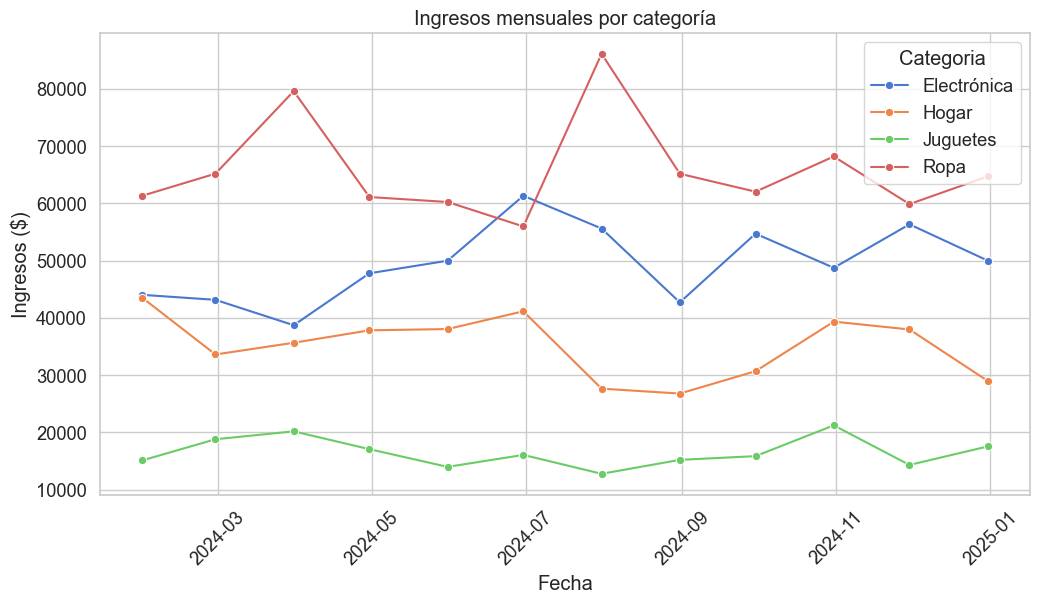

In [26]:

# Evolución mensual de ingresos por categoría
plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_mensuales, x="Fecha", y="Monto", hue="Categoria", marker="o")
plt.title("Ingresos mensuales por categoría")
plt.xlabel("Fecha")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()


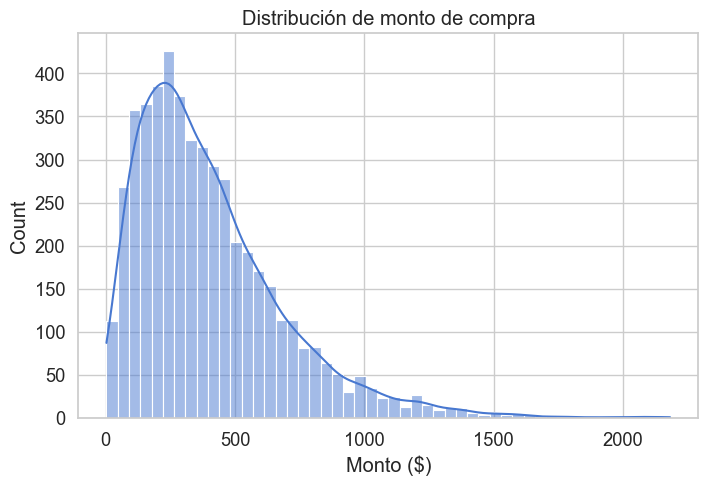

In [27]:

# Distribución de los montos de compra individuales
plt.figure(figsize=(8,5))
sns.histplot(df["Monto"], bins=50, kde=True)
plt.title("Distribución de monto de compra")
plt.xlabel("Monto ($)")
plt.show()


Simulación Montecarlo

Ingreso mensual promedio: 166792.89, desviación: 8891.36


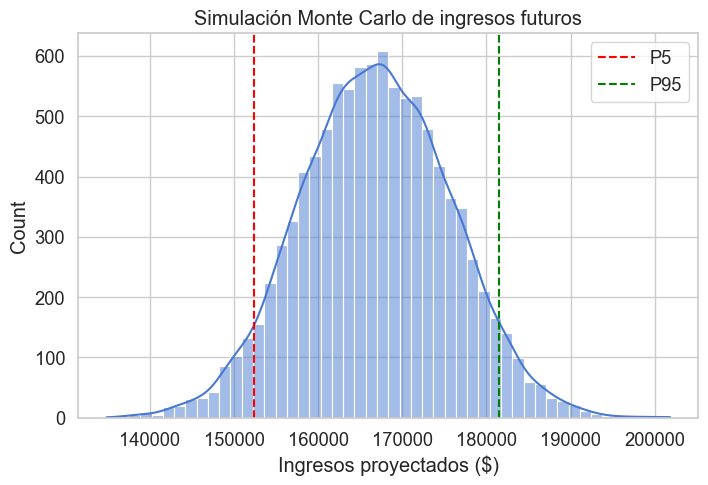

In [28]:
# Tomamos la media y desviación de los ingresos mensuales totales
ingresos_mes = df.groupby("Fecha")["Monto"].sum()
mu = ingresos_mes.mean() # promedio historico / valor más esperado
sigma = ingresos_mes.std() # variabilidad historica

print(f"Ingreso mensual promedio: {mu:.2f}, desviación: {sigma:.2f}")

# Simulamos 10,000 posibles escenarios para el próximo mes
simulaciones = np.random.normal(mu, sigma, 10000)

# Visualización
plt.figure(figsize=(8,5))
sns.histplot(simulaciones, bins=50, kde=True)
plt.axvline(np.percentile(simulaciones, 5), color="red", linestyle="--", label="P5")
plt.axvline(np.percentile(simulaciones, 95), color="green", linestyle="--", label="P95")
plt.title("Simulación Monte Carlo de ingresos futuros")
plt.xlabel("Ingresos proyectados ($)")
plt.legend()
plt.show()


In [29]:
p5 = np.percentile(simulaciones, 5)
p95 = np.percentile(simulaciones, 95)
print(f'P5: {p5:.2f}')
print(f'P95: {p95:.2f}')

print(f'Los ingresos del próximo mes se van a encontrar entre ${p5:.2f} y ${p95:.2f}.Con un 90% de confianza.\nEl escenario más probable escercano a ${mu:.2f}')

P5: 152391.29
P95: 181438.91
Los ingresos del próximo mes se van a encontrar entre $152391.29 y $181438.91.Con un 90% de confianza.
El escenario más probable escercano a $166792.89
